### IMPORTANDO BIBLIOTECAS/MÓDULOS

In [1]:
from pycaret.datasets import get_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

### SELECIONANDO E TRATANDO O DATASET

In [2]:
df = get_data('titanic')
df = df.drop('Cabin', axis=1)
df = df.dropna(subset='Embarked',axis=0)
df = df.fillna(method='ffill')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


### PRÉ-PROCESSAMENTO E DIVISÃO DOS DADOS EM TREINO E TESTE

In [3]:
escala = MinMaxScaler()
to_numeric = OneHotEncoder(sparse=False)

X_escala = escala.fit_transform(df.drop('Survived', axis=1).select_dtypes(exclude='object'))
X_numeric = to_numeric.fit_transform(df.select_dtypes(include='object'))
X = np.append(X_escala,X_numeric,axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(711, 1580)
(178, 1580)
(711,)
(178,)


### AVALIAÇÃO DE TODOS OS MODELOS SELECIONADOS


 RandomForestClassifier(max_depth=6, n_estimators=500) 

Acuracia = 71.35
Recall = 30.43


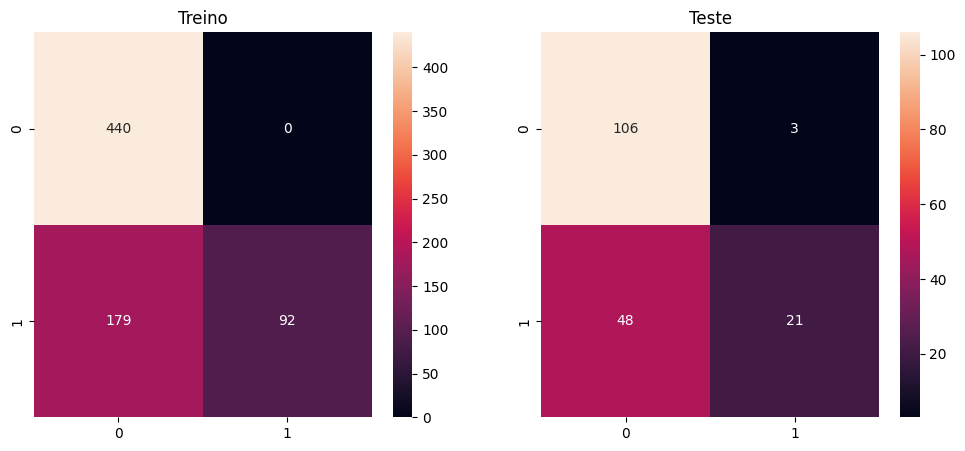

Avaliação Final Dados de Teste
              precision    recall  f1-score   support

           0       0.69      0.97      0.81       109
           1       0.88      0.30      0.45        69

    accuracy                           0.71       178
   macro avg       0.78      0.64      0.63       178
weighted avg       0.76      0.71      0.67       178


 ExtraTreesClassifier(max_depth=6, n_estimators=500) 

Acuracia = 69.66
Recall = 24.64


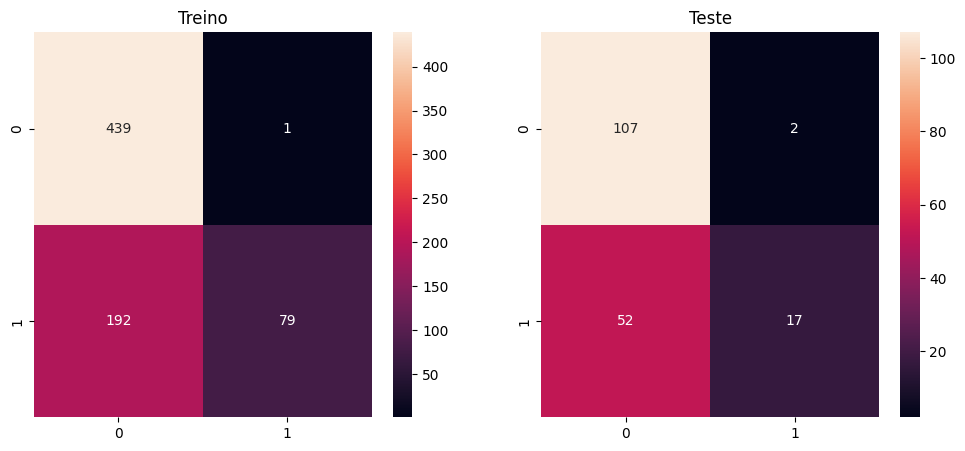

Avaliação Final Dados de Teste
              precision    recall  f1-score   support

           0       0.67      0.98      0.80       109
           1       0.89      0.25      0.39        69

    accuracy                           0.70       178
   macro avg       0.78      0.61      0.59       178
weighted avg       0.76      0.70      0.64       178


 AdaBoostClassifier() 

Acuracia = 78.65
Recall = 75.36


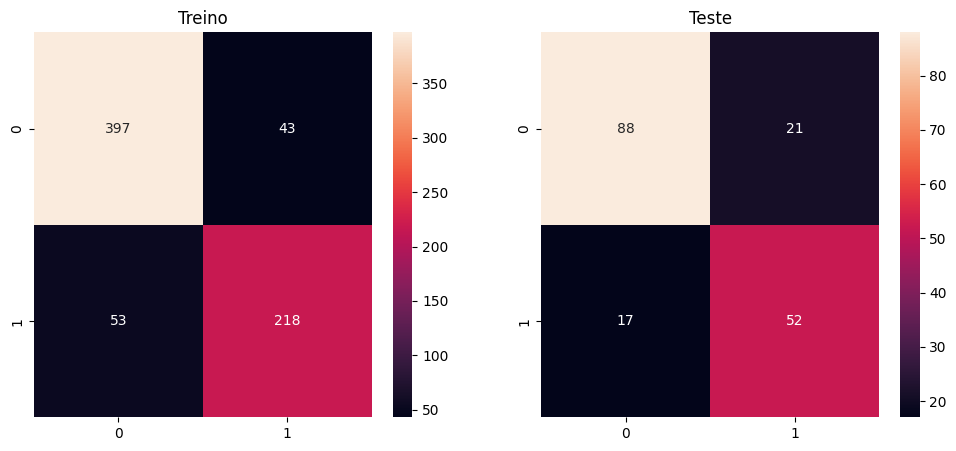

Avaliação Final Dados de Teste
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       109
           1       0.71      0.75      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178


 GradientBoostingClassifier() 

Acuracia = 80.34
Recall = 71.01


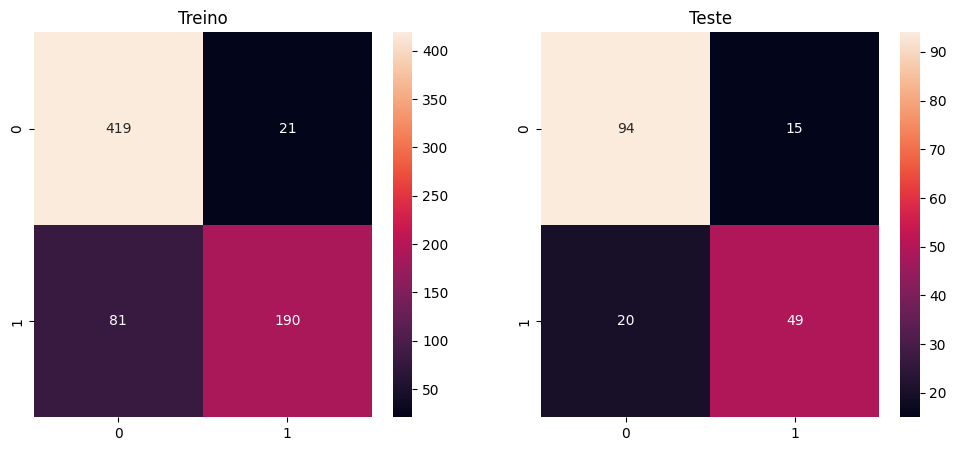

Avaliação Final Dados de Teste
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       109
           1       0.77      0.71      0.74        69

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178


 GaussianNB() 

Acuracia = 42.7
Recall = 86.96


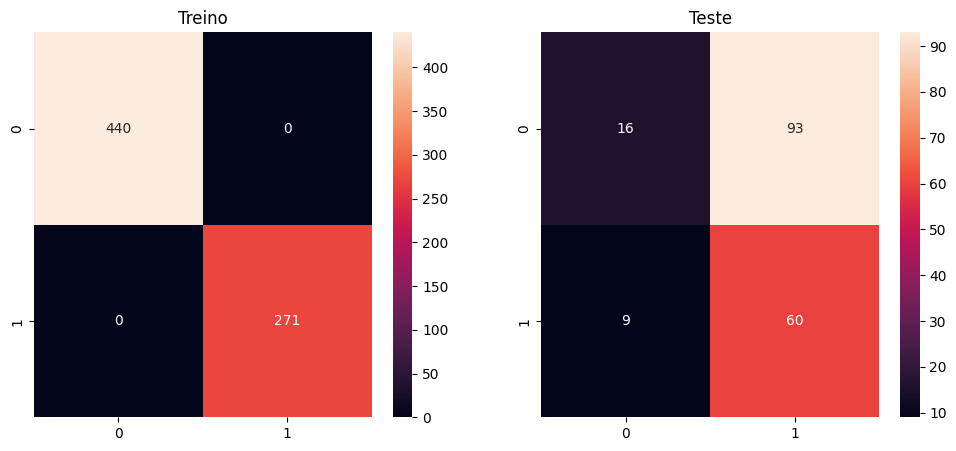

Avaliação Final Dados de Teste
              precision    recall  f1-score   support

           0       0.64      0.15      0.24       109
           1       0.39      0.87      0.54        69

    accuracy                           0.43       178
   macro avg       0.52      0.51      0.39       178
weighted avg       0.54      0.43      0.36       178


 DecisionTreeClassifier(max_depth=6) 

Acuracia = 77.53
Recall = 71.01


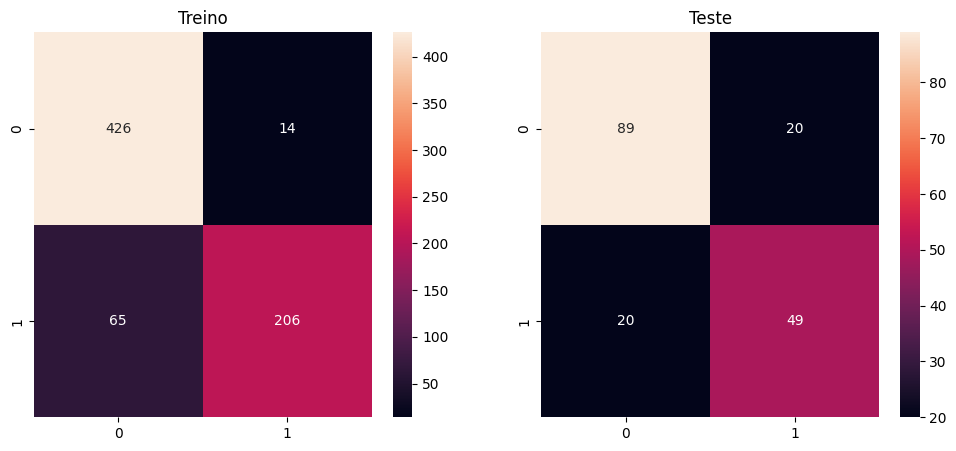

Avaliação Final Dados de Teste
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       109
           1       0.71      0.71      0.71        69

    accuracy                           0.78       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.78      0.78      0.78       178


 KNeighborsClassifier() 

Acuracia = 78.65
Recall = 71.01


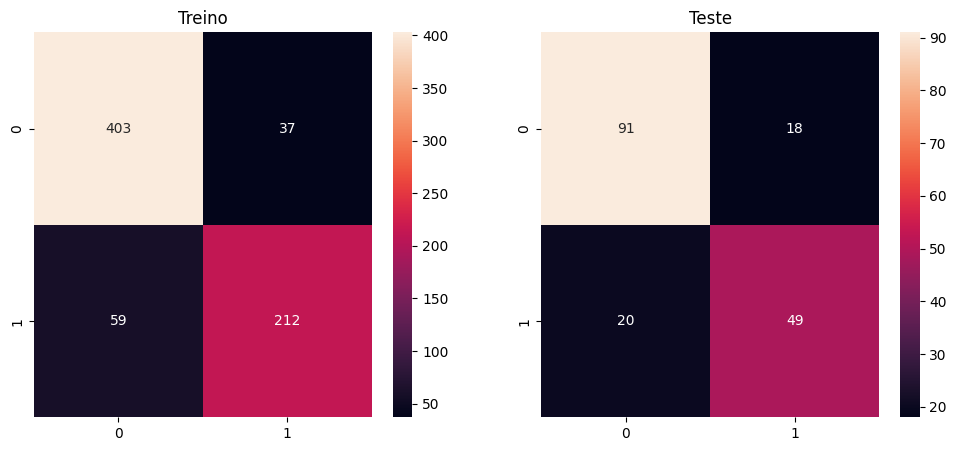

Avaliação Final Dados de Teste
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       109
           1       0.73      0.71      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178


 MLPClassifier() 

Acuracia = 81.46
Recall = 81.16


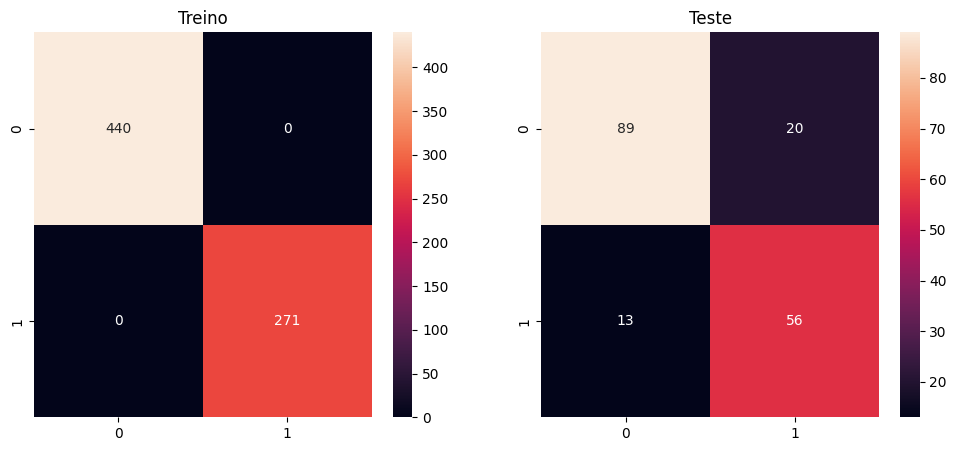

Avaliação Final Dados de Teste
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       109
           1       0.74      0.81      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178


 MLPClassifier(solver='lbfgs') 

Acuracia = 79.78
Recall = 76.81


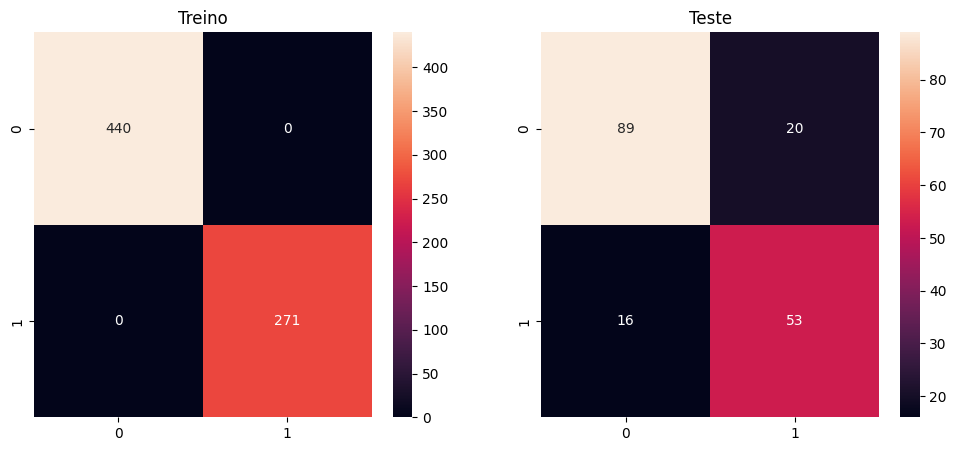

Avaliação Final Dados de Teste
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178


 MLPClassifier(solver='sgd') 

Acuracia = 79.78
Recall = 76.81


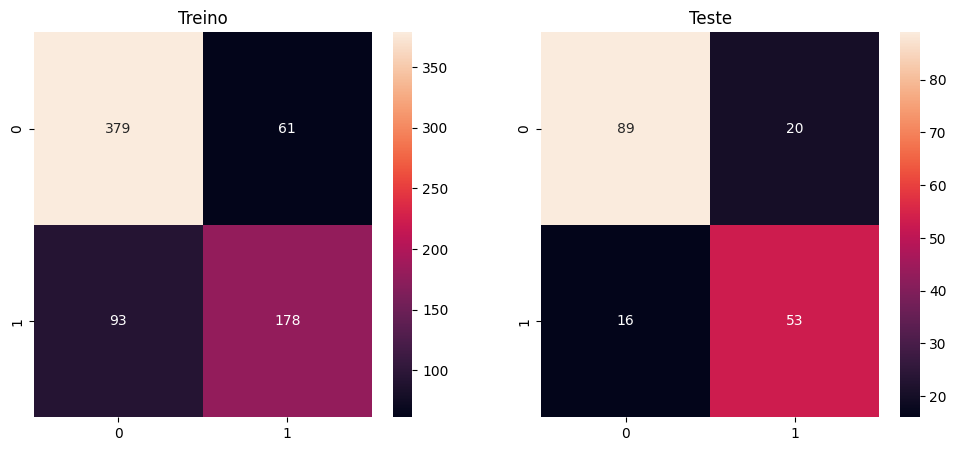

Avaliação Final Dados de Teste
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178


 SVC(kernel='linear') 

Acuracia = 81.46
Recall = 81.16


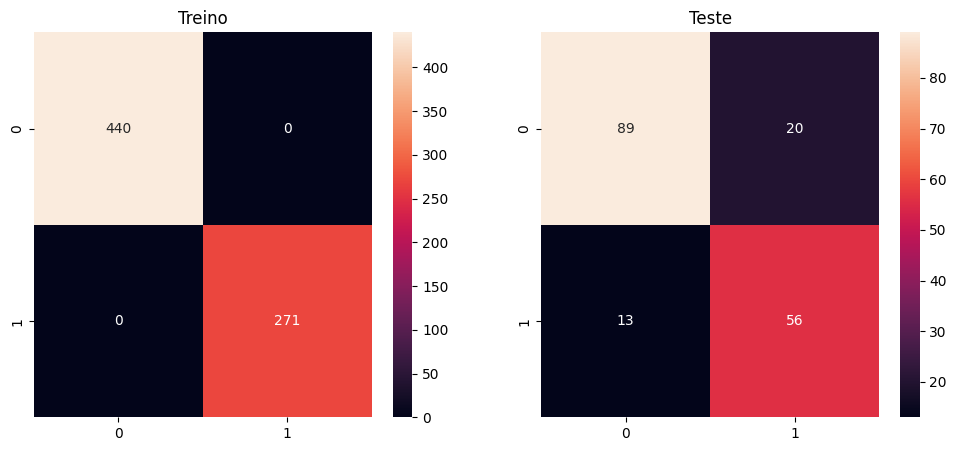

Avaliação Final Dados de Teste
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       109
           1       0.74      0.81      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178


 SVC(kernel='sigmoid') 

Acuracia = 78.09
Recall = 72.46


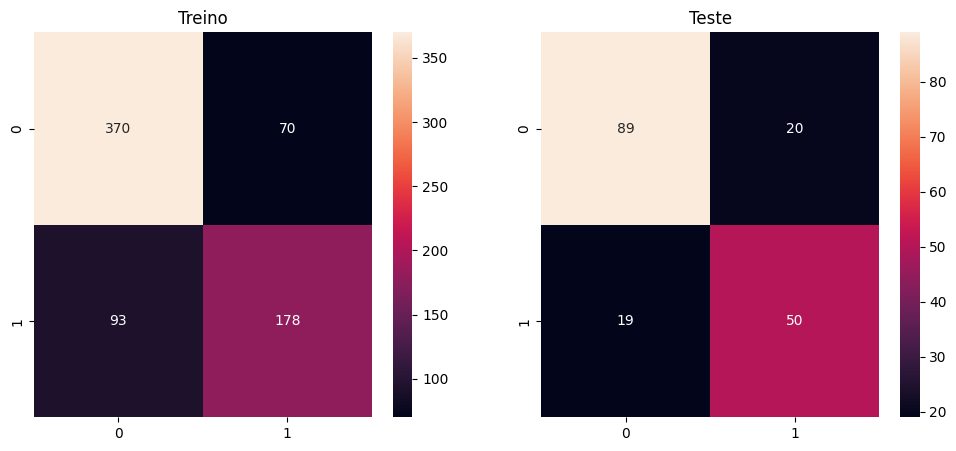

Avaliação Final Dados de Teste
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       109
           1       0.71      0.72      0.72        69

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178


 SVC() 

Acuracia = 79.21
Recall = 75.36


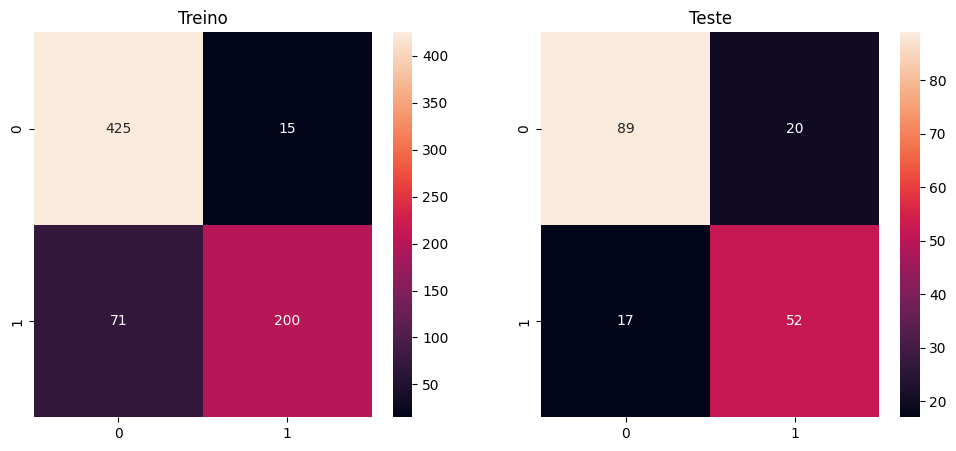

Avaliação Final Dados de Teste
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       109
           1       0.72      0.75      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.79      0.79      0.79       178



,Modelo,Acuracia,Recall
7,MLPClassifier(),81.46,81.16
10,SVC(kernel='linear'),81.46,81.16
3,([DecisionTreeRegressor(criterion='friedman_ms...,80.34,71.01
8,MLPClassifier(solver='lbfgs'),79.78,76.81
9,MLPClassifier(solver='sgd'),79.78,76.81
12,SVC(),79.21,75.36
2,"(DecisionTreeClassifier(max_depth=1, random_st...",78.65,75.36
6,KNeighborsClassifier(),78.65,71.01
11,SVC(kernel='sigmoid'),78.09,72.46
5,DecisionTreeClassifier(max_depth=6),77.53,71.01


In [4]:
modelos = [RandomForestClassifier(max_depth=6, n_estimators=500), ExtraTreesClassifier(max_depth=6, n_estimators=500), AdaBoostClassifier(), GradientBoostingClassifier(), 
          GaussianNB(), DecisionTreeClassifier(max_depth=6),
          KNeighborsClassifier(n_neighbors=5), MLPClassifier(solver='adam'), MLPClassifier(solver='lbfgs'), MLPClassifier(solver='sgd'), 
          SVC(kernel='linear'), SVC(kernel='sigmoid'), SVC(kernel='rbf')]

lista_validacao = []

for modelo in modelos:
    modelo.fit(X_train,y_train)
    predict_train = modelo.predict(X_train)
    predict = modelo.predict(X_test)
    print('\n',modelo,'\n')
    Acuracia = np.round(accuracy_score(y_test, predict) * 100,2)
    Recall = np.round(recall_score(y_test, predict) * 100,2)
    print(f'Acuracia = {Acuracia}')
    print(f'Recall = {Recall}')

    lista_validacao.append((modelo,Acuracia,Recall))

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.title('Treino')
    sns.heatmap(confusion_matrix(y_train,predict_train),annot=True,fmt='.0f')

    plt.subplot(1,2,2)
    plt.title('Teste')
    sns.heatmap(confusion_matrix(y_test,predict),annot=True,fmt='.0f')

    plt.show()

    print('Avaliação Final Dados de Teste')
    print(classification_report(y_test,predict))
    
validacao = pd.DataFrame(lista_validacao,columns=['Modelo', 'Acuracia', 'Recall'])
validacao.sort_values('Acuracia', ascending=False, inplace=True)

validacao

### AVALIANDO AS PREDIÇÕES NA BASE COMPLETA

In [ ]:
df['Predict'] = 'BEST_MODEL'.predict(X)
df

### SALVANDO OS MODELOS DE MACHINE LEARNING E DE PRÉ-PROCESSAMENTO

In [ ]:
import joblib

joblib.dump('BEST_MODEL','model.pkl')
joblib.dump(escala,'escala.joblib')
joblib.dump(to_numeric,'numeric.joblib')

### CARREGANDO O MODELO DE MACHINE LEARNING E OS MODELOS DE PRÉ-PROCESSAMENTO

In [ ]:
import joblib

modelo = joblib.load('model.pkl')
scala = joblib.load('escala.joblib')
numeric = joblib.load('numeric.joblib')